# Linear Equations and Matrix Algebra

```{index} single: Linear Equations and Matrix Algebra
```

## Overview

Many problems in economics and finance require solving linear equations.

In this lecture we discuss linear equations and their applications.

To illustrate the importance of linear equations, we begin with a two good
model of supply and demand.

The two good case is so simple that solutions can be calculated by hand.

But often we need to consider markets containing many goods.

In the multiple goods case we face large systems of linear equations, with many equations
and unknowns.

To handle such systems we need two things:

* matrix algebra (and the knowledge of how to use it) plus
* computer code to apply matrix algebra to the problems of interest.

This lecture covers these steps.

We will use the following packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A two good example

In this section we discuss a simple two good example and solve it by

1. pencil and paper
2. matrix algebra

The second method is more general, as we will see.


### Pencil and paper methods

Suppose that we have two related goods, such as 

* propane and ethanol, and
* rice and wheat, etc. 

To keep things simple, we label them as good 0 and good 1.

The demand for each good depends on the price of both goods:

```{math}
:label: two_eq_demand
\begin{aligned}
    q_0^d = 100 - 10 p_0 - 5 p_1 \\
    q_1^d = 50 - p_0 - 10 p_1
\end{aligned}
```

(We are assuming demand decreases when the price of either good goes up, but
other cases are also possible.)

Let's suppose that supply is given by 

```{math}
:label: two_eq_supply
\begin{aligned}
    q_0^s = 10 p_0 + 5 p_1 \\
    q_1^s = 5 p_0 + 10 p_1
\end{aligned}
```

Equilibrium holds when supply equals demand ($q_0^s = q_0^d$ and $q_1^s = q_1^d$).

This yields the linear system

```{math}
:label: two_equilibrium
\begin{aligned}
    100 - 10 p_0 - 5 p_1 = 10 p_0 + 5 p_1 \\
    50 - p_0 - 10 p_1 = 5 p_0 + 10 p_1
\end{aligned}
```

We can solve this with pencil and paper to get

$$
    p_0 = 4.41 \quad \text{and} \quad p_1 = 1.18.
$$    

Inserting these results into either {eq}`two_eq_demand` or {eq}`two_eq_supply` yields the
equilibrium quantities 

$$
    q_0 = 50 \quad \text{and} \quad q_1 = 33.82.
$$


### Looking forward

Pencil and paper methods are easy in the two good case.

But what if there are many goods?

For such problems we need matrix algebra.

Before solving problems with matrix algebra, let's first recall the
basics of vectors and matrices, in both theory and computation.



## {index}`Vectors <single: Vectors>`

 ```{index} single: Linear Algebra; Vectors
 ```

A **vector** of length $n$ is just a sequence (or array, or tuple) of $n$ numbers, which we write as $x = (x_1, \ldots, x_n)$ or $x = \begin{bmatrix}x_1, \ldots, x_n\end{bmatrix}$.

We can write these sequences either horizontally or vertically.

But when we use matrix operations, our default assumption is that vectors are
column vectors.

The set of all $n$-vectors is denoted by $\mathbb R^n$.

```{prf:example}
:label: le_ex_dim

* $\mathbb R^2$ is the plane --- the set of pairs $(x_1, x_2)$.
* $\mathbb R^3$ is 3 dimensional space --- the set of vectors $(x_1, x_2, x_3)$.
```

Often vectors are represented visually as arrows from the origin to the point.

Here's a visualization.

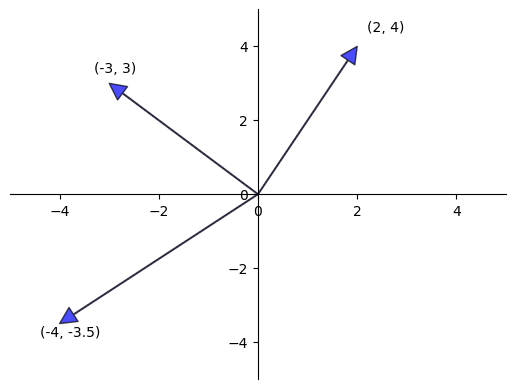

In [2]:
fig, ax = plt.subplots()
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))

vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

### Vector operations

```{index} single: Vectors; Operations
```

Sometimes we want to modify vectors.

The two most common operators on vectors are addition and scalar
multiplication, which we now describe.

When we add two vectors, we add them element-by-element.

```{prf:example}
:label: le_ex_add

$$
\begin{bmatrix}
    4 \\
    -2 
\end{bmatrix}
+
\begin{bmatrix}
    3 \\
    3 
\end{bmatrix}
=
\begin{bmatrix}
    4 & + & 3 \\
    -2 & + & 3 
\end{bmatrix}
=
\begin{bmatrix}
    7 \\
    1
\end{bmatrix}.
$$
```

In general,

$$
x + y =
\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix} +
\begin{bmatrix}
     y_1 \\
     y_2 \\
    \vdots \\
     y_n
\end{bmatrix} :=
\begin{bmatrix}
    x_1 + y_1 \\
    x_2 + y_2 \\
    \vdots \\
    x_n + y_n
\end{bmatrix}.
$$

We can visualise vector addition in $\mathbb{R}^2$ as follows.

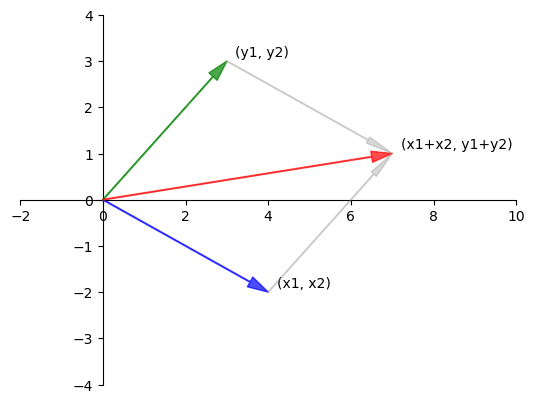

In [3]:
fig, ax = plt.subplots()
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 10), ylim=(-4, 4))
# ax.grid()
vecs = ((4, -2), (3, 3), (7, 1))
tags = ('(x1, x2)', '(y1, y2)', '(x1+x2, y1+y2)')
colors = ('blue', 'green', 'red')
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(color=colors[i],
                shrink=0,
                alpha=0.7,
                width=0.5,
                headwidth=8,
                headlength=15))
    ax.text(v[0] + 0.2, v[1] + 0.1, tags[i])

for i, v in enumerate(vecs):
    ax.annotate('', xy=(7, 1), xytext=v,
                arrowprops=dict(color='gray',
                shrink=0,
                alpha=0.3,
                width=0.5,
                headwidth=5,
                headlength=20))
plt.show()

Scalar multiplication is an operation that multiplies a vector $x$ with a scalar elementwise.

```{prf:example}
:label: le_ex_mul

$$
-2
\begin{bmatrix}
    3 \\
    -7 
\end{bmatrix}
=
\begin{bmatrix}
    -2 & \times & 3 \\
    -2 & \times & -7
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\
    14
\end{bmatrix}.
$$
```

More generally, it takes a number $\gamma$ and a vector $x$ and produces

$$
\gamma x :=
\begin{bmatrix}
    \gamma x_1 \\
    \gamma x_2 \\
    \vdots \\
    \gamma x_n
\end{bmatrix}.
$$

Scalar multiplication is illustrated in the next figure.

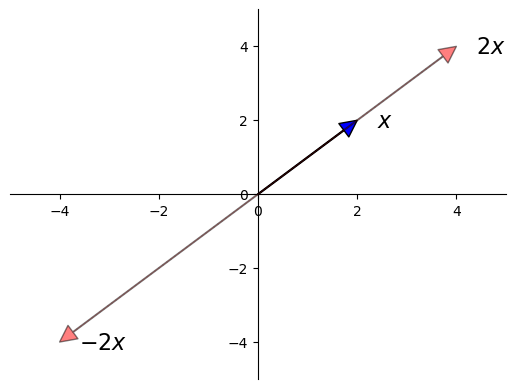

In [4]:
fig, ax = plt.subplots()
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')

scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In Python, a vector can be represented as a list or tuple, 
such as `x = [2, 4, 6]` or `x = (2, 4, 6)`.

However, it is more common to represent vectors with 
[NumPy arrays](https://python-programming.quantecon.org/numpy.html#numpy-arrays).

One advantage of NumPy arrays is that scalar multiplication and addition have
very natural syntax.

In [5]:
x = np.ones(3)            # Vector of three ones
y = np.array((2, 4, 6))   # Converts tuple (2, 4, 6) into a NumPy array
x + y                     # Add (element-by-element)

array([3., 5., 7.])

In [6]:
4 * x                     # Scalar multiply

array([4., 4., 4.])

### Inner product and norm

```{index} single: Vectors; Inner Product
```

```{index} single: Vectors; Norm
```

The **inner product** of vectors $x,y \in \mathbb R^n$ is defined as

$$
x^\top y = 
\begin{bmatrix}
    \color{red}{x_1} & \color{blue}{x_2} & \cdots & x_n
\end{bmatrix}
\begin{bmatrix}
    \color{red}{y_1} \\
    \color{blue}{y_2} \\
    \vdots \\
    y_n
\end{bmatrix}
= {\color{red}{x_1 y_1}} + {\color{blue}{x_2 y_2}} + \cdots + x_n y_n
:= \sum_{i=1}^n x_i y_i.
$$

The **norm** of a vector $x$ represents its "length" (i.e., its distance from
the zero vector) and is defined as

$$
    \| x \| := \sqrt{x^\top x} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}.
$$

The expression $\| x - y\|$ can be thought of as the "distance" between $x$ and $y$.

The inner product and norm can be computed as follows

In [7]:
np.sum(x*y)      # Inner product of x and y

12.0

In [8]:
x @ y            # Another way to compute the inner product 

12.0

In [9]:
np.sqrt(np.sum(x**2))  # Norm of x, method one

1.7320508075688772

In [10]:
np.linalg.norm(x)      # Norm of x, method two

1.7320508075688772

## Matrix operations

```{index} single: Matrix; Operations
```

When we discussed linear price systems, we mentioned using matrix algebra.

Matrix algebra is similar to algebra for numbers.

Let's review some details.

### Addition and scalar multiplication

Just as was the case for vectors, we can add, subtract and scalar multiply
matrices.

Scalar multiplication and addition are generalizations of the vector case:

```{prf:example}
:label: le_ex_asm

$$
3
\begin{bmatrix}
    2 & -13 \\
    0 & 5
\end{bmatrix}
=
\begin{bmatrix}
    6 & -39 \\
    0 & 15
\end{bmatrix}.
$$
```

In general for a number $\gamma$ and any matrix $A$,

$$
\gamma A =
\gamma
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk}
\end{bmatrix}.
$$

```{prf:example}
:label: le_ex_ma

Consider this example of matrix addition,

$$
\begin{bmatrix}
    1 & 5 \\
    7 & 3 \\
\end{bmatrix}
+
\begin{bmatrix}
    12 & -1 \\
    0 & 9
\end{bmatrix}
=
\begin{bmatrix}
    13 & 4 \\
    7 & 12
\end{bmatrix}.
$$
```

In general,

$$
A + B =
\begin{bmatrix}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk}
\end{bmatrix} +
\begin{bmatrix}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk}
\end{bmatrix}.
$$

In the latter case, the matrices must have the same shape in order for the
definition to make sense.

### Matrix multiplication

We also have a convention for *multiplying* two matrices.

The rule for matrix multiplication generalizes the idea of inner products
discussed above.

If $A$ and $B$ are two matrices, then their product $A B$ is formed by taking
as its $i,j$-th element the inner product of the $i$-th row of $A$ and the
$j$-th column of $B$.

If $A$ is $n \times k$ and $B$ is $j \times m$, then to multiply $A$ and $B$
we require $k = j$, and the resulting matrix $A B$ is $n \times m$.

```{prf:example}
:label: le_ex_2dmul

Here's an example of a $2 \times 2$ matrix multiplied by a $2 \times 1$ vector.

$$
Ax =
\begin{bmatrix}
    \color{red}{a_{11}} & \color{red}{a_{12}} \\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    \color{red}{x_1} \\
    \color{red}{x_2}
\end{bmatrix}
=
\begin{bmatrix}
    \color{red}{a_{11}x_1 + a_{12}x_2} \\
    a_{21}x_1 + a_{22}x_2
\end{bmatrix}
$$
```

As an important special case, consider multiplying $n \times k$
matrix $A$ and $k \times 1$ column vector $x$.

According to the preceding rule, this gives us an $n \times 1$ column vector.

```{math}
:label: la_atx

A x =
{\begin{bmatrix}
    a_{11} & a_{12} &  \cdots & a_{1k} \\
    \vdots & \vdots & & \vdots \\
    \color{red}{a_{i1}} & \color{red}{a_{i2}} & \color{red}{\cdots} & \color{red}{a_{i}k} \\
    \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}}_{n \times k}
{\begin{bmatrix}
    \color{red}{x_{1}}  \\
    \color{red}{x_{2}}  \\
    \color{red}{\vdots} \\
    \color{red}{\vdots}  \\
    \color{red}{x_{k}}
\end{bmatrix}}_{k \times 1} :=
{\begin{bmatrix}
    a_{11} x_1 + a_{22} x_2 + \cdots + a_{1k} x_k \\
    \vdots \\
    \color{red}{a_{i1} x_1 + a_{i2} x_2 + \cdots + a_{ik} x_k} \\
    \vdots \\
    a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nk} x_k
\end{bmatrix}}_{n \times 1}
```

Here is a simple illustration of multiplication of two matrices.

$$
AB =
\begin{bmatrix}
    a_{11} & a_{12} \\
    \color{red}{a_{21}} & \color{red}{a_{22}} \\
\end{bmatrix}
\begin{bmatrix}
    b_{11} & \color{red}{b_{12}} \\
    b_{21} & \color{red}{b_{22}} \\
\end{bmatrix} :=
\begin{bmatrix}
    a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
    a_{21}b_{11} + a_{22}b_{21} & \color{red}{a_{21}b_{12} + a_{22}b_{22}}
\end{bmatrix}
$$

There are many tutorials to help you further visualize this operation, such as 

* [this one](http://www.mathsisfun.com/algebra/matrix-multiplying.html), or
* the discussion on the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication).


```{note}
Unlike number products, $A B$ and $B A$ are not generally the same thing.
```

One important special case is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), which has ones on the principal diagonal and zero elsewhere:

$$
    I = 
    \begin{bmatrix}
        1 & \cdots & 0 \\
        \vdots & \ddots & \vdots \\
        0 &  \cdots & 1
    \end{bmatrix}
$$

It is a useful exercise to check the following:

* if $A$ is $n \times k$ and $I$ is the $k \times k$ identity matrix, then $AI = A$, and
* if $I$ is the $n \times n$ identity matrix, then $IA = A$.



### Matrices in NumPy

```{index} single: Matrix; Numpy
```

NumPy arrays are also used as matrices, and have fast, efficient functions and methods for all the standard matrix operations.

You can create them manually from tuples of tuples (or lists of lists) as follows

In [11]:
A = ((1, 2),
     (3, 4))

type(A)

tuple

In [12]:
A = np.array(A)

type(A)

numpy.ndarray

In [13]:
A.shape

(2, 2)

The `shape` attribute is a tuple giving the number of rows and columns ---
see [here](https://python-programming.quantecon.org/numpy.html#shape-and-dimension)
for more discussion.

To get the transpose of `A`, use `A.transpose()` or, more simply, `A.T`.

There are many convenient functions for creating common matrices (matrices of zeros,
ones, etc.) --- see [here](https://python-programming.quantecon.org/numpy.html#creating-arrays).

Since operations are performed elementwise by default, scalar multiplication and addition have very natural syntax.

In [14]:
A = np.identity(3)    # 3 x 3 identity matrix
B = np.ones((3, 3))   # 3 x 3 matrix of ones
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [15]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

To multiply matrices we use the `@` symbol.


```{note}
In particular, `A @ B` is matrix multiplication, whereas `A * B` is element-by-element multiplication.
```

### Two good model in matrix form

We can now revisit the two good model and solve {eq}`two_equilibrium`
numerically via matrix algebra.

This involves some extra steps but the method is widely applicable --- as we
will see when we include more goods.

First we rewrite {eq}`two_eq_demand` as

```{math}
:label: two_eq_demand_mat
    q^d = D p + h
    \quad \text{where} \quad
    q^d = 
    \begin{bmatrix}
        q_0^d \\
        q_1^d
    \end{bmatrix}
    \quad
    D = 
    \begin{bmatrix}
         -10 & - 5  \\
         - 1  & - 10  
    \end{bmatrix}
    \quad \text{and} \quad
    h =
    \begin{bmatrix}
        100 \\
        50
    \end{bmatrix}.
```

Recall that $p \in \mathbb{R}^{2}$ is the price of two goods.

(Please check that $q^d = D p + h$ represents the same equations as {eq}`two_eq_demand`.)

We rewrite {eq}`two_eq_supply` as

```{math}
:label: two_eq_supply_mat
    q^s = C p 
    \quad \text{where} \quad
    q^s = 
    \begin{bmatrix}
        q_0^s \\
        q_1^s
    \end{bmatrix}
    \quad \text{and} \quad
    C = 
    \begin{bmatrix}
         10 & 5  \\
         5 & 10  
    \end{bmatrix}.
```

Now equality of supply and demand can be expressed as $q^s = q^d$, or

$$
    C p = D p + h.
$$

We can rearrange the terms to get 

$$
    (C - D) p = h.
$$

If all of the terms were numbers, we could solve for prices as $p = h /
(C-D)$.

Matrix algebra allows us to do something similar: we can solve for equilibrium
prices using the inverse of $C - D$:

```{math}
:label: two_matrix
    p = (C - D)^{-1} h.
```

Before we implement the solution let us consider a more general setting.



### More goods

It is natural to think about demand systems with more goods.

For example, even within energy commodities there are many different goods,
including crude oil, gasoline, coal, natural gas, ethanol, and uranium.

The prices of these goods are related, so it makes sense to study them
together.

Pencil and paper methods become very time consuming with large systems.

But fortunately the matrix methods described above are essentially unchanged.

In general, we can write the demand equation as $q^d = Dp + h$, where

* $q^d$ is an $n \times 1$ vector of demand quantities for $n$ different goods.
* $D$ is an $n \times n$ "coefficient" matrix.
* $h$ is an $n \times 1$ vector of constant values.

Similarly, we can write the supply equation as $q^s = Cp + e$, where

* $q^s$ is an $n \times 1$ vector of supply quantities for the same goods.
* $C$ is an $n \times n$ "coefficient" matrix.
* $e$ is an $n \times 1$ vector of constant values.

To find an equilibrium, we solve $Dp + h = Cp + e$, or

```{math}
:label: n_eq_sys_la
    (D- C)p = e - h.
```

Then the price vector of the n different goods is

$$ 
    p = (D- C)^{-1}(e - h).
$$


### General linear systems

A more general version of the problem described above looks as follows.

```{math}
:label: la_se

\begin{matrix}
    a_{11} x_1 & + & a_{12} x_2 & + & \cdots & + & a_{1n} x_n & = & b_1 \\
    \vdots & & \vdots & & & & \vdots & & \vdots \\
    a_{n1} x_1 & + & a_{n2} x_2 & + & \cdots & + & a_{nn} x_n & = & b_n
\end{matrix}
```

The objective here is to solve for the "unknowns" $x_1, \ldots, x_n$.

We take as given the coefficients $a_{11}, \ldots, a_{nn}$ and constants $b_1, \ldots, b_n$.

Notice that we are treating a setting where the number of unknowns equals the
number of equations.

This is the case where we are most likely to find a well-defined solution.

(The other cases are referred to as [overdetermined](https://en.wikipedia.org/wiki/Overdetermined_system) and [underdetermined](https://en.wikipedia.org/wiki/Underdetermined_system) systems
of equations --- we defer discussion of these cases until later lectures.)

In matrix form, the system {eq}`la_se` becomes

```{math}
:label: la_gf
    A x = b
    \quad \text{where} \quad
    A = 
    \begin{bmatrix}
        a_{11} &  \cdots & a_{1n} \\
        \vdots & \vdots  & \vdots \\
        a_{n1} &  \cdots & a_{nn}
    \end{bmatrix}
    \quad \text{and} \quad
    b =
    \begin{bmatrix}
        b_1 \\
        \vdots \\
        b_n
    \end{bmatrix}.
```

```{prf:example}
:label: le_ex_gls
For example, {eq}`n_eq_sys_la` has this form with 

$$ 
    A = D - C, 
    \quad
    b = e - h
    \quad \text{and} \quad
    x = p.
$$
```

When considering problems such as {eq}`la_gf`, we need to ask at least some of
the following questions

* Does a solution actually exist?
* If a solution exists, how should we compute it?



## Solving systems of equations

```{index} single: Matrix; Solving Systems of Equations
```

Recall again the system of equations {eq}`la_se`, which we write here again as

```{math}
:label: la_se2
    A x = b.
```

The problem we face is to find a vector $x \in \mathbb R^n$ that solves
{eq}`la_se2`, taking $b$ and $A$ as given.

We may not always find a unique vector $x$ that solves {eq}`la_se2`.

We illustrate two such cases below.

### No solution

Consider the system of equations given by,

$$
\begin{aligned}
    x + 3y &= 3 \\
    2x + 6y &= -8.
\end{aligned}
$$

It can be verified manually that this system has no possible solution.

To illustrate why this situation arises let's plot the two lines.

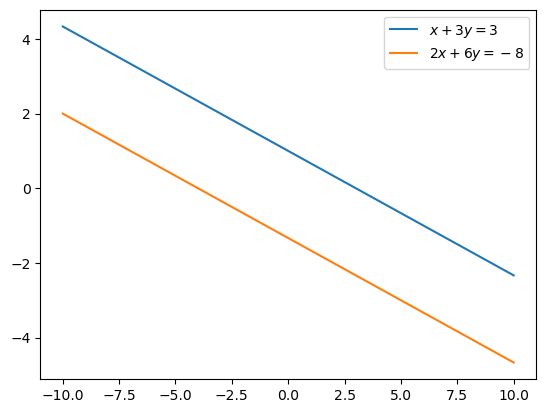

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-10, 10)
plt.plot(x, (3-x)/3, label=f'$x + 3y = 3$')
plt.plot(x, (-8-2*x)/6, label=f'$2x + 6y = -8$')
plt.legend()
plt.show()

Clearly, these are parallel lines and hence we will never find a point $x \in \mathbb{R}^2$
such that these lines intersect.

Thus, this system has no possible solution.

We can rewrite this system in matrix form as

```{math}
:label: no_soln
    A x = b
    \quad \text{where} \quad
    A =
    \begin{bmatrix}
        1 & 3 \\
        2 & 6 
    \end{bmatrix}
    \quad \text{and} \quad
    b =
    \begin{bmatrix}
        3 \\
        -8
    \end{bmatrix}.
```

It can be noted that the $2^{nd}$ row of matrix $A = (2, 6)$ is just a scalar multiple of the $1^{st}$ row of matrix $A = (1, 3)$.

The rows of matrix $A$ in this case are called **linearly dependent.**



```{note}
Advanced readers can find a detailed explanation of linear dependence and
independence [here](https://python.quantecon.org/linear_algebra.html#linear-independence).

But these details are not needed in what follows.

```



### Many solutions

Now consider,

$$
\begin{aligned}
    x - 2y &= -4 \\
    -2x + 4y &= 8.
\end{aligned}
$$

Any vector $v = (x,y)$ such that $x = 2y - 4$ will solve the above system.

Since we can find infinite such vectors this system has infinitely many solutions.

This is because the rows of the corresponding matrix 

```{math}
:label: many_solns
    A =
    \begin{bmatrix}
        1 & -2 \\
        -2 & 4
    \end{bmatrix}.
```

are linearly dependent --- can you see why?

We now impose conditions on $A$ in {eq}`la_se2` that rule out these problems.


### Nonsingular matrices

To every square matrix we can assign a unique number called the
[determinant](https://en.wikipedia.org/wiki/Determinant).

For $2 \times 2$ matrices, the determinant is given by,

$$
\begin{bmatrix}
    \color{red}{a} & \color{blue}{b} \\
    \color{blue}{c} & \color{red}{d}
\end{bmatrix}
=
{\color{red}{ad}} - {\color{blue}{bc}}.
$$

If the determinant of $A$ is not zero, then we say that $A$ is *nonsingular*.

A square matrix $A$ is nonsingular if and only if the rows and columns of $A$
are linearly independent.

A more detailed explanation of matrix inverse can be found [here](https://www.mathsisfun.com/algebra/matrix-inverse.html).

You can check yourself that the in {eq}`no_soln` and {eq}`many_solns` with
linearly dependent rows are singular matrices.

This gives us a useful one-number summary of whether or not a square matrix
can be inverted.

In particular, a square matrix $A$ has a nonzero determinant, if and only if
it possesses an *inverse matrix* $A^{-1}$, with the property that $A A^{-1} =
A^{-1} A = I$.

As a consequence, if we pre-multiply both sides of $Ax = b$ by $A^{-1}$, we
get

```{math}
:label: la_se_inv
    x = A^{-1} b.
```

This is the solution to $Ax = b$ --- the solution we are looking for.



### Linear equations with NumPy

```{index} single: Linear Algebra; SciPy
```

In the two good example we obtained the matrix equation,

$$
p = (C-D)^{-1} h.
$$

where $C$, $D$ and $h$ are given by {eq}`two_eq_demand_mat` and {eq}`two_eq_supply_mat`.

This equation is analogous to {eq}`la_se_inv` with $A = (C-D)^{-1}$, $b = h$, and $x = p$.

We can now solve for equilibrium prices with NumPy's `linalg` submodule.

All of these routines are Python front ends to time-tested and highly optimized FORTRAN code.

In [17]:
C = ((10, 5),      # Matrix C
     (5, 10))

Now we change this to a NumPy array.

In [18]:
C = np.array(C)

In [19]:
D = ((-10, -5),     # Matrix D
     (-1, -10))
D = np.array(D)

In [20]:
h = np.array((100, 50))   # Vector h
h.shape = 2,1             # Transforming h to a column vector

In [21]:
from numpy.linalg import det, inv
A = C - D
# Check that A is nonsingular (non-zero determinant), and hence invertible
det(A)

340.0000000000001

In [22]:
A_inv = inv(A)  # compute the inverse
A_inv

array([[ 0.05882353, -0.02941176],
       [-0.01764706,  0.05882353]])

In [23]:
p = A_inv @ h  # equilibrium prices
p

array([[4.41176471],
       [1.17647059]])

In [24]:
q = C @ p  # equilibrium quantities
q

array([[50.        ],
       [33.82352941]])

Notice that we get the same solutions as the pencil and paper case.

We can also solve for $p$ using `solve(A, h)` as follows.

In [25]:
from numpy.linalg import solve
p = solve(A, h)  # equilibrium prices
p

array([[4.41176471],
       [1.17647059]])

In [26]:
q = C @ p  # equilibrium quantities
q

array([[50.        ],
       [33.82352941]])

Observe how we can solve for $x = A^{-1} y$ by either via `inv(A) @ y`, or using `solve(A, y)`.

The latter method uses a different algorithm that is numerically more stable and hence should be the default option.



## Exercises

```{exercise-start}
:label: lin_eqs_ex1
```

Let's consider a market with 3 commodities - good 0, good 1 and good 2.

The demand for each good depends on the price of the other two goods and is given by:

$$
\begin{aligned}
    q_0^d & = 90 - 15p_0 + 5p_1 + 5p_2 \\
    q_1^d & = 60 + 5p_0 - 10p_1 + 10p_2 \\
    q_2^d & = 50 + 5p_0 + 5p_1 - 5p_2
\end{aligned}
$$

(Here demand decreases when own price increases but increases when prices of other goods increase.)

The supply of each good is given by:

$$
\begin{aligned}
    q_0^s & = -10 + 20p_0 \\
    q_1^s & = -15 + 15p_1 \\
    q_2^s & =  -5 + 10p_2
\end{aligned}
$$

Equilibrium holds when supply equals demand, i.e, $q_0^d = q_0^s$, $q_1^d = q_1^s$ and $q_2^d = q_2^s$.

1. Set up the market as a system of linear equations.
2. Use matrix algebra to solve for equilibrium prices. Do this using both the `numpy.linalg.solve`
   and `inv(A)` methods. Compare the solutions.

```{exercise-end}
```
```{solution-start} lin_eqs_ex1
:class: dropdown
```

The generated system would be:

$$
\begin{aligned}
    35p_0 - 5p_1 - 5p_2 = 100 \\
    -5p_0 + 25p_1 - 10p_2 = 75 \\
    -5p_0 - 5p_1 + 15p_2 = 55
\end{aligned}
$$

In matrix form we will write this as:

$$
Ap = b
\quad \text{where} \quad
A =
\begin{bmatrix}
    35 & -5 & -5 \\
    -5 & 25 & -10 \\
    -5 & -5 & 15
\end{bmatrix}
, \quad p =
\begin{bmatrix}
    p_0 \\
    p_1 \\
    p_2
\end{bmatrix}
\quad \text{and} \quad
b = 
\begin{bmatrix}
    100 \\
    75 \\
    55
\end{bmatrix}
$$

In [27]:
import numpy as np
from numpy.linalg import det

A = np.array([[35, -5, -5],  # matrix A
              [-5, 25, -10],
              [-5, -5, 15]])

b = np.array((100, 75, 55))  # column vector b
b.shape = (3, 1)

det(A)  # check if A is nonsingular

9999.99999999999

In [28]:
# Using inverse
from numpy.linalg import det

A_inv = inv(A)

p = A_inv @ b
p

array([[4.9625],
       [7.0625],
       [7.675 ]])

In [29]:
# Using numpy.linalg.solve
from numpy.linalg import solve
p = solve(A, b)
p

array([[4.9625],
       [7.0625],
       [7.675 ]])

The solution is given by:
$$
p_0 = 4.6925, \; p_1 = 7.0625 \;\; \text{and} \;\; p_2 = 7.675
$$

```{solution-end}
```

```{exercise-start}
:label: lin_eqs_ex2
```
Earlier in the lecture we discussed cases where the system of equations given by $Ax = b$ has no solution.

In this case $Ax = b$ is called an _inconsistent_ system of equations.

When faced with an inconsistent system we try to find the best "approximate" solution.

There are various methods to do this, one such method is the **method of least squares.**

Suppose we have an inconsistent system 

```{math}
:label: inconsistent
    Ax = b
```
where $A$ is an $m \times n$ matrix and $b$ is an $m \times 1$ column vector.

A **least squares solution** to {eq}`inconsistent` is an $n \times 1$ column vector $\hat{x}$ such that, for all other vectors $x \in \mathbb{R}^n$, the distance from $A\hat{x}$ to $b$
is less than the distance from $Ax$ to $b$.

That is,

$$
    \|A\hat{x} - b\| \leq \|Ax - b\| 
$$

It can be shown that, for the system of equations $Ax = b$, the least squares
solution $\hat{x}$ is 

```{math}
:label: least_squares
    \hat{x} =  (A^T A)^{-1} A^T b
```

Now consider the general equation of a linear demand curve of a good given by:

$$
    p = m - nq
$$

where $p$ is the price of the good and $q$ is the quantity demanded.

Suppose we are trying to *estimate* the values of $m$ and $n$.

We do this by repeatedly observing the price and quantity (for example, each
month) and then choosing $m$ and $n$ to fit the relationship between $p$ and
$q$.

We have the following observations:

| Price | Quantity Demanded |
|:-----:|:-----------------:|
|   1   |         9         |
|   3   |         7         |
|   8   |         3         |


Requiring the demand curve $p = m - nq$ to pass through all these points leads to the
following three equations:

$$
\begin{aligned}
    1 = m - 9n \\
    3 = m - 7n \\
    8 = m - 3n
\end{aligned}
$$

Thus we obtain a system of equations $Ax = b$ where $A = \begin{bmatrix} 1 & -9 \\ 1 & -7 \\ 1 & -3 \end{bmatrix}$,
$x = \begin{bmatrix} m \\ n \end{bmatrix}$ and $b = \begin{bmatrix} 1 \\ 3 \\ 8 \end{bmatrix}$.

It can be verified that this system has no solutions.

(The problem is that we have three equations and only two unknowns.)

We will thus try to find the best approximate solution for $x$.

1. Use {eq}`least_squares` and matrix algebra to find the least squares solution $\hat{x}$.
2. Find the least squares solution using `numpy.linalg.lstsq` and compare the results.

```{exercise-end}
```

```{solution-start} lin_eqs_ex2
:class: dropdown
```

In [30]:
import numpy as np
from numpy.linalg import inv

In [31]:
# Using matrix algebra
A = np.array([[1, -9],  # matrix A
              [1, -7],
              [1, -3]])

A_T = np.transpose(A)  # transpose of matrix A

b = np.array((1, 3, 8))  # column vector b
b.shape = (3, 1)

x = inv(A_T @ A) @ A_T @ b
x

array([[11.46428571],
       [ 1.17857143]])

In [32]:
# Using numpy.linalg.lstsq
x, res, _, _ = np.linalg.lstsq(A, b, rcond=None)

In [33]:
print(f"x\u0302 = {x}")
print(f"\u2016Ax\u0302 - b\u2016\u00B2 = {res[0]}")

x̂ = [[11.46428571]
 [ 1.17857143]]
‖Ax̂ - b‖² = 0.07142857142857066


Here is a visualization of how the least squares method approximates the equation of a line connecting a set of points.

We can also describe this as "fitting" a line between a set of points.

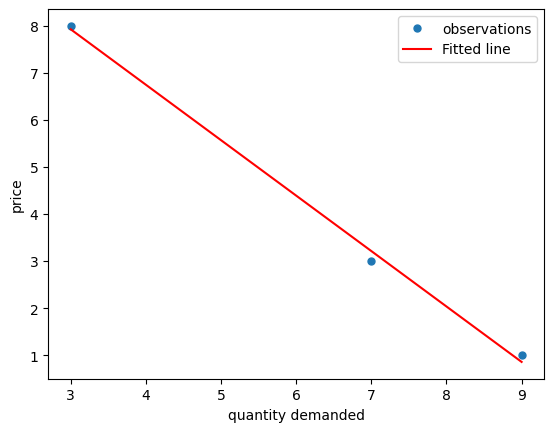

In [34]:
fig, ax = plt.subplots()
p = np.array((1, 3, 8))
q = np.array((9, 7, 3))

a, b = x

ax.plot(q, p, 'o', label='observations', markersize=5)
ax.plot(q, a - b*q, 'r', label='Fitted line')
plt.xlabel('quantity demanded')
plt.ylabel('price')
plt.legend()
plt.show()

```{solution-end}
```


### Further reading

The documentation of the `numpy.linalg` submodule can be found [here](https://numpy.org/devdocs/reference/routines.linalg.html).

More advanced topics in linear algebra can be found [here](https://python.quantecon.org/linear_algebra.html#id5).